In [2]:
# Import pytorch and other packages 

import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Let's check if we have gpu

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"We will the device: {device}")

We will the device: cpu


In [18]:
# creating the data is again simple
x_input = np.linspace(0,100,9)# This creates the input x from 0 to 100 in 9 steps

y_input = np.sqrt(x_input**4 + 100*np.sin(x_input))

# Plotting the data to look at the trend

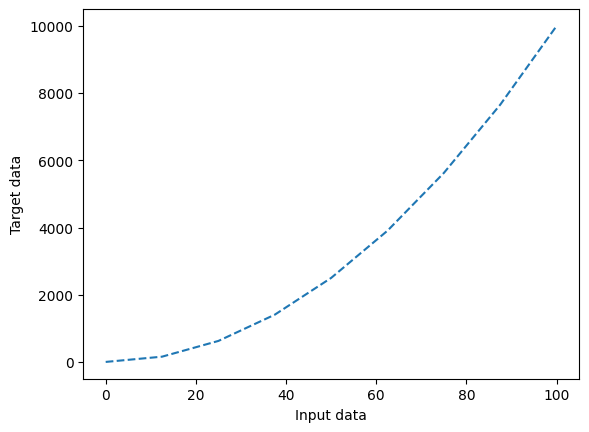

In [20]:
plt.plot(x_input,y_input,'--')
plt.xlabel('Input data')
plt.ylabel('Target data')
plt.show()


# Splitting the data into training data, test data

We will start by creating the training and test data into torch tensors

In [21]:
input = torch.from_numpy(x_input).type(torch.float)
output = torch.from_numpy(y_input).type(torch.float)
print(input)

tensor([  0.0000,  12.5000,  25.0000,  37.5000,  50.0000,  62.5000,  75.0000,
         87.5000, 100.0000])


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input,output, test_size=0.1, random_state=42)
print(x_train)

tensor([ 12.5000,  62.5000,   0.0000, 100.0000,  25.0000,  50.0000,  37.5000,
         75.0000])


# The neural network architecture

In [32]:
from torch import nn 

# Creating a child class of nn.Module for our usecase
class another_map(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(in_features=1, out_features=5)
        self.linear_layer2 = nn.Linear(in_features=5, out_features=1)
        
        # Now we need a function forward
    def forward (self, x:torch.Tensor):
        return self.linear_layer2(self.linear_layer1(x))

# Set manual seed in order to not initialise it randomly
torch.manual_seed(42)

# Creating a new instance of the subclass another_map()
model1 = another_map()


# Checking our model
model1, model1.state_dict()


(another_map(
   (linear_layer1): Linear(in_features=1, out_features=5, bias=True)
   (linear_layer2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer1.weight',
               tensor([[ 0.7645],
                       [ 0.8300],
                       [-0.2343],
                       [ 0.9186],
                       [-0.2191]])),
              ('linear_layer1.bias',
               tensor([ 0.2018, -0.4869,  0.5873,  0.8815, -0.7336])),
              ('linear_layer2.weight',
               tensor([[0.3887, 0.0837, 0.3304, 0.0606, 0.2156]])),
              ('linear_layer2.bias', tensor([-0.0631]))]))

In [40]:
# LEt's check if the model is working
x_train = x_train.unsqueeze(dim=1)
with torch.inference_mode():
    y_preds = model1(x_train)

print(y_preds)

tensor([[[ 3.7843]],

        [[18.6666]],

        [[ 0.0638]],

        [[29.8283]],

        [[ 7.5049]],

        [[14.9460]],

        [[11.2255]],

        [[22.3871]]])


# Loss function and Optimizer

In [49]:
# Creating the loss function
loss_fn = nn.MSELoss()

# Choosing the Optimzier
optimizer = torch.optim.Adam(params = model1.parameters(), lr = 0.0001)

# It's training time

In [44]:
import time

In [57]:
# Setting the number of epochs
epochs = 1000000

# Creating empty arrays to track the loss
train_loss_values = []
test_loss_values = []
epoch_count = []

start_time = time.time()

for epoch in range(epochs):
    ### Training
    model1.train()

    # Calculate the forward pass
    y_preds = model1(x_train)

    # Calculate the loss
    loss = loss_fn(y_preds, y_train)

    # Putting all the gradients to zero
    optimizer.zero_grad()

    # Calculate the backward pass
    loss.backward()

    # Updating the value of the parameters
    optimizer.step()

    #Now, put the model in evaluation mode
    model1.eval()

    with torch.inference_mode():
        #Calculate the test values
        test_preds = model1(x_test)

        # Calculate the test loss
        test_loss = loss_fn(y_test, test_preds)

        # Printing it out cleanly to understand
        if epoch % 100000==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | Train Loss: {loss} | Test loss: {test_loss}")

# Printing how much time it took to train the model
end_time = time.time()
delta_time = end_time-start_time
print(f"Total training time:{delta_time:.4f} seconds")

Epoch: 0 | Train Loss: 10533092.0 | Test loss: 18949842.0
Epoch: 100000 | Train Loss: 10277955.0 | Test loss: 21426782.0
Epoch: 200000 | Train Loss: 10277955.0 | Test loss: 21426818.0
Epoch: 300000 | Train Loss: 10277956.0 | Test loss: 21426800.0
Epoch: 400000 | Train Loss: 10277955.0 | Test loss: 21426810.0
Epoch: 500000 | Train Loss: 10277956.0 | Test loss: 21426810.0
Epoch: 600000 | Train Loss: 10277955.0 | Test loss: 21426846.0
Epoch: 700000 | Train Loss: 10277955.0 | Test loss: 21426736.0
Epoch: 800000 | Train Loss: 10277955.0 | Test loss: 21426656.0
Epoch: 900000 | Train Loss: 10277955.0 | Test loss: 21426800.0
Total training time:252.0810 seconds
